In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [4]:
numerical = pd.read_csv('numerical.csv')
categorical = pd.read_csv('categorical.csv')
display(numerical.head())
display(numerical.shape)
display(categorical.head())
display(categorical.shape)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


(9134, 8)

,state,response,coverage,education,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize


(9134, 14)

In [7]:
data = pd.concat([numerical, categorical], axis=1)
data.isna().sum()
data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,state,response,...,employment_status,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,2763.519279,56274,69,32,5,0,1,384.811147,Washington,No,...,Employed,F,Suburban,Married,Corporate Auto,3,1,Agent,Two-Door Car,Medsize
1,6979.535903,0,94,13,42,0,8,1131.464935,Arizona,No,...,Unemployed,F,Suburban,Single,Personal Auto,3,3,Agent,Four-Door Car,Medsize
2,12887.431650,48767,108,18,38,0,2,566.472247,Nevada,No,...,Employed,F,Suburban,Married,Personal Auto,3,1,Agent,Two-Door Car,Medsize
3,7645.861827,0,106,18,65,0,7,529.881344,California,No,...,Unemployed,M,Suburban,Married,Corporate Auto,2,1,Call Center,SUV,Medsize
4,2813.692575,43836,73,12,44,0,1,138.130879,Washington,No,...,Employed,M,Rural,Single,Personal Auto,1,1,Agent,Four-Door Car,Medsize


### Import sklearn train_test_split and separate the data.

In [8]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [10]:
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'], axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7307, 21)
(1827, 21)
(7307,)
(1827,)


### Separate X_train and X_test into numerical and categorical (X_train_cat , X_train_num , X_test_cat , X_test_num)

In [16]:
X_train_num = X_train.select_dtypes(include = np.number)
X_train_cat = X_train.select_dtypes(include = object)
X_test_num = X_test.select_dtypes(include = np.number)
X_test_cat = X_test.select_dtypes(include = object)

### Use X_train_num to fit scalers. Transform BOTH X_train_num and X_test_num.

In [17]:
MinMaxtransformer = MinMaxScaler().fit(X_train_num)
X_train_normalized = MinMaxtransformer.transform(X_train_num)
X_train_normalized

array([[0.03525778, 0.51153719, 0.        , ..., 1.        , 1.        ,
        0.        ],
       [0.01141572, 0.        , 0.07594937, ..., 0.        , 0.5       ,
        0.66666667],
       [0.01246368, 0.81112411, 0.05485232, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.08713005, 0.        , 0.28691983, ..., 0.75      , 0.        ,
        0.        ],
       [0.15642705, 0.        , 0.32911392, ..., 0.125     , 1.        ,
        0.        ],
       [0.01782732, 0.7810684 , 0.09704641, ..., 0.        , 0.5       ,
        0.33333333]])

In [18]:
X_test_normalized = MinMaxtransformer.transform(X_test_num)
X_test_normalized

array([[0.02854843, 0.74599174, 0.18987342, ..., 0.        , 1.        ,
        0.33333333],
       [0.0444118 , 0.23222412, 0.04219409, ..., 0.375     , 0.5       ,
        1.        ],
       [0.02345789, 0.94921035, 0.13924051, ..., 0.        , 1.        ,
        0.33333333],
       ...,
       [0.03392461, 0.89851072, 0.23206751, ..., 0.        , 1.        ,
        0.        ],
       [0.0023497 , 0.        , 0.00843882, ..., 0.        , 0.5       ,
        0.        ],
       [0.17506272, 0.        , 0.20253165, ..., 0.125     , 1.        ,
        0.        ]])

### Encode the categorical variables X_train_cat and X_test_cat

In [20]:
encoder = OneHotEncoder(drop='first').fit(X_train_cat)

X_train_encode = encoder.transform(X_train_cat).toarray()

X_train_encode

array([[0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [21]:
X_test_encode = encoder.transform(X_test_cat).toarray()

X_test_encode

array([[1., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 1., 0.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [22]:
X_train = np.concatenate((X_train_normalized,X_train_encode),axis=1)
X_test = np.concatenate((X_test_normalized,X_test_encode),axis=1)

### Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

In [ ]:
pd.DataFrame(X_train).dtypes

### Try a simple linear regression with all the data to see whether we are getting good results.

In [25]:
from sklearn import linear_model
from sklearn.metrics import r2_score
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)
predictions_test = lm.predict(X_test)
r2 = r2_score(y_test, predictions_test)
r2

0.7640742237720473

### Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [26]:
from sklearn.neighbors import KNeighborsRegressor

In [34]:
def knn_scores(X_train, y_train, X_test, y_test):
    scores = []
    for k in range(2,25):
        model = KNeighborsRegressor(n_neighbors=k)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
        
    plt.figure(figsize=(10,6))
    plt.plot(range(2,25),scores,color = 'blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('R2-scores vs. K Value')
    plt.gca().invert_yaxis()
    plt.xlabel('K')
    plt.ylabel('Accuracy')
    plt.show()
    return scores

### Use the function to check LinearRegressor and KNeighborsRegressor.

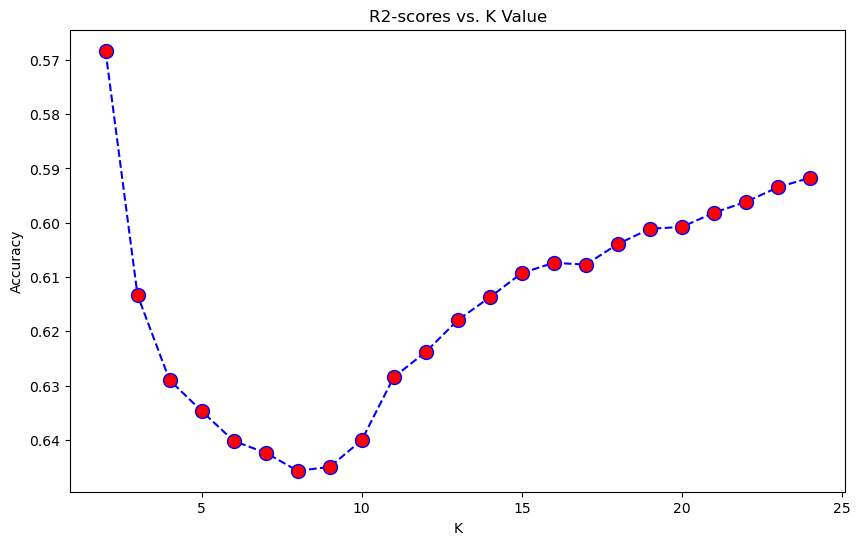

[0.5683305077555674,
 0.6133290851415742,
 0.6289567168341847,
 0.6346538970913258,
 0.6401642134612229,
 0.6423582517322575,
 0.6456577157155767,
 0.6449740886271584,
 0.6400374446247672,
 0.6284428103428026,
 0.623790579178533,
 0.6179387559003935,
 0.6137203681272771,
 0.6092671801357279,
 0.6073706588343502,
 0.6077147195054503,
 0.6039045219163038,
 0.6011090615018612,
 0.6007755298622024,
 0.5981555203856477,
 0.5961518861004502,
 0.5934748703822139,
 0.5917147399461242]

In [35]:
knn_scores(X_train, y_train, X_test, y_test)

In [38]:
KNN = KNeighborsRegressor(n_neighbors=8)
KNN.fit(X_train, y_train)
score_knn = KNN.score(X_test, y_test)
score_knn

0.6456577157155767

In [44]:
KNN = KNeighborsRegressor(n_neighbors=8, weights='distance')
KNN.fit(X_train, y_train)
score_knn_2 = KNN.score(X_test, y_test)
score_knn_2

0.6576410572458058

### You can check also the MLPRegressor for this task!

In [37]:
from sklearn.neural_network import MLPRegressor

# the model
MLP_model = MLPRegressor(hidden_layer_sizes=(100, ), max_iter=1000, random_state=42)

# fit the model
MLP_model.fit(X_train, y_train)

# score
score = MLP_model.score(X_test, y_test)
score

/Users/amr/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8178782454092302

### Check and discuss the results.

In [45]:
print(f"R^2 Score with LinearRegressor: {round(r2,2)}")
print(f"R^2 Score with KNN: {round(score_knn,2)}")
print(f"R^2 Score with KNN with weights: {round(score_knn,2)}")
print(f"R^2 Score with MLPRegressor: {round(score,2)}")

R^2 Score with LinearRegressor: 0.76
R^2 Score with KNN: 0.65
R^2 Score with KNN with weights: 0.65
R^2 Score with MLPRegressor: 0.82


- The knn give the max score at 8 neighbors, changing the wieghts and the metric didn't provide any improvement in score
- However the linear regression gave a better score
- Lastly the MLP regressor got the best score (it took longer time to compute with these parameters compared to the other 2 models)